# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

The new format for the SAT was released in March 2016. As an employee of the College Board - the organization that administers the SAT - you are a part of a team that tracks statewide participation and recommends where money is best spent to improve SAT participation rates. Your presentation and report should be geared toward **non-technical** executives with the College Board and you will use the provided data and outside research to make recommendations about how the College Board might work to increase the participation rate in a **Georgia**.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:

sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')


#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
sat_2017.head(10)

State Participation  Evidence-Based Reading and Writing  \
0               Alabama            5%                                 593   
1                Alaska           38%                                 547   
2               Arizona           30%                                 563   
3              Arkansas            3%                                 614   
4            California           53%                                 531   
5              Colorado           11%                                 606   
6           Connecticut          100%                                 530   
7              Delaware          100%                                 503   
8  District of Columbia          100%                                 482   
9               Florida           83%                                 520   

   Math  Total  
0   572   1165  
1   533   1080  
2   553   1116  
3   594   1208  
4   524   1055  
5   595   1201  
6   512   1041  
7   492    996  
8   468    950  
9   497   1017

In [4]:
act_2017.head(10)

State Participation  English  Math  Reading  Science  \
0              National           60%     20.3  20.7     21.4     21.0   
1               Alabama          100%     18.9  18.4     19.7     19.4   
2                Alaska           65%     18.7  19.8     20.4     19.9   
3               Arizona           62%     18.6  19.8     20.1     19.8   
4              Arkansas          100%     18.9  19.0     19.7     19.5   
5            California           31%     22.5  22.7     23.1     22.2   
6              Colorado          100%     20.1  20.3     21.2     20.9   
7           Connecticut           31%     25.5  24.6     25.6     24.6   
8              Delaware           18%     24.1  23.4     24.8     23.6   
9  District of Columbia           32%     24.4  23.5     24.9     23.5   

  Composite  
0      21.0  
1      19.2  
2      19.8  
3      19.7  
4      19.4  
5      22.8  
6      20.8  
7      25.2  
8      24.1  
9      24.2

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

<strong> Answer: </strong>

1. sat_2017 shows the average partcipation rate, SAT scores (by subjects), and total scores by states.

2. act_2017 shows the average paritcipation rate, ACT scores (by subjects), and composite scores by states. There are also aggregated National scores that sat_2017 does not have. 


#### 4a. Does the data look complete? 

In [5]:
sat_2017.shape

(51, 5)

In [6]:
act_2017.shape

(52, 7)

<strong> Answer: </strong>

Not complete for sat_2017. Missing national aggregated scores for sat_2017.


#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [7]:
sat_2017_source = pd.read_csv('../data/sat_2017_source.csv')
act_2017_source = pd.read_csv('../data/act_2017_source.csv')

In [8]:
sat_2017_source.head(10)

State Participation  ERW  Math  Total
0               Alabama            5%  593   572   1165
1                Alaska           38%  547   533   1080
2               Arizona           30%  563   553   1116
3              Arkansas            3%  614   594   1208
4            California           53%  531   524   1055
5              Colorado           11%  606   595   1201
6           Connecticut          100%  530   512   1041
7              Delaware          100%  503   492    996
8  District of Columbia          100%  482   468    950
9               Florida           83%  520   497   1017

In [9]:
sat_2017_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State            51 non-null object
Participation    51 non-null object
ERW              51 non-null int64
Math             51 non-null int64
Total            51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [10]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [11]:
sat_2017_source.describe()

ERW        Math        Total
count   51.000000   51.000000    51.000000
mean   569.117647  556.882353  1126.098039
std     45.666901   47.121395    92.494812
min    482.000000  468.000000   950.000000
25%    533.500000  523.500000  1055.500000
50%    559.000000  548.000000  1107.000000
75%    613.000000  599.000000  1212.000000
max    644.000000  651.000000  1295.000000

In [12]:
sat_2017.describe()

Evidence-Based Reading and Writing        Math        Total
count                           51.000000   51.000000    51.000000
mean                           569.117647  547.627451  1126.098039
std                             45.666901   84.909119    92.494812
min                            482.000000   52.000000   950.000000
25%                            533.500000  522.000000  1055.500000
50%                            559.000000  548.000000  1107.000000
75%                            613.000000  599.000000  1212.000000
max                            644.000000  651.000000  1295.000000

In [13]:
act_2017_source.head(10)

State Participation  English  Math  Reading  Science  \
0               Alabama          100%     18.9  18.4     19.7     19.4   
1                Alaska           65%     18.7  19.8     20.4     19.9   
2               Arizona           62%     18.6  19.8     20.1     19.8   
3              Arkansas          100%     18.9  19.0     19.7     19.5   
4            California           31%     22.5  22.7     23.1     22.2   
5              Colorado          100%     20.1  20.3     21.2     20.9   
6           Connecticut           31%     25.5  24.6     25.6     24.6   
7              Delaware           18%     24.1  23.4     24.8     23.6   
8  District of Columbia           32%     24.4  23.5     24.9     23.5   
9               Florida           73%     19.0  19.4     21.0     19.4   

   Composite  
0       19.2  
1       19.8  
2       19.7  
3       19.4  
4       22.8  
5       20.8  
6       25.2  
7       24.1  
8       24.2  
9       19.8

In [14]:
act_2017.head(10)

State Participation  English  Math  Reading  Science  \
0              National           60%     20.3  20.7     21.4     21.0   
1               Alabama          100%     18.9  18.4     19.7     19.4   
2                Alaska           65%     18.7  19.8     20.4     19.9   
3               Arizona           62%     18.6  19.8     20.1     19.8   
4              Arkansas          100%     18.9  19.0     19.7     19.5   
5            California           31%     22.5  22.7     23.1     22.2   
6              Colorado          100%     20.1  20.3     21.2     20.9   
7           Connecticut           31%     25.5  24.6     25.6     24.6   
8              Delaware           18%     24.1  23.4     24.8     23.6   
9  District of Columbia           32%     24.4  23.5     24.9     23.5   

  Composite  
0      21.0  
1      19.2  
2      19.8  
3      19.7  
4      19.4  
5      22.8  
6      20.8  
7      25.2  
8      24.1  
9      24.2

In [15]:
act_2017.tail(10)

State Participation  English  Math  Reading  Science Composite
42   South Dakota           80%     20.7  21.5     22.3     22.0      21.8
43      Tennessee          100%     19.5  19.2     20.1     19.9      19.8
44          Texas           45%     19.5  20.7     21.1     20.9      20.7
45           Utah          100%     19.5  19.9     20.8     20.6      20.3
46        Vermont           29%     23.3  23.1     24.4     23.2      23.6
47       Virginia           29%     23.5  23.3     24.6     23.5      23.8
48     Washington           29%     20.9  21.9     22.1     22.0      21.9
49  West Virginia           69%     20.0  19.4     21.2     20.5      20.4
50      Wisconsin          100%     19.7  20.4     20.6     20.9      20.5
51        Wyoming          100%     19.4  19.8     20.8     20.6     20.2x

In [16]:
act_2017_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
State            51 non-null object
Participation    51 non-null object
English          51 non-null float64
Math             51 non-null float64
Reading          51 non-null float64
Science          51 non-null float64
Composite        51 non-null float64
dtypes: float64(5), object(2)
memory usage: 2.9+ KB


In [17]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 2.9+ KB


In [18]:
act_2017_source.describe()

English       Math    Reading    Science  Composite
count  51.000000  51.000000  51.000000  51.000000  51.000000
mean   20.931373  21.182353  22.013725  21.450980  21.519608
std     2.353677   1.981989   2.067271   1.739353   2.020695
min    16.300000  18.000000  18.100000  18.200000  17.800000
25%    19.000000  19.400000  20.450000  19.950000  19.800000
50%    20.700000  20.900000  21.800000  21.300000  21.400000
75%    23.300000  23.100000  24.150000  23.200000  23.600000
max    25.500000  25.300000  26.000000  24.900000  25.500000

In [19]:
act_2017.describe()

English       Math    Reading    Science
count  52.000000  52.000000  52.000000  52.000000
mean   20.919231  21.173077  22.001923  21.040385
std     2.332132   1.963602   2.048672   3.151113
min    16.300000  18.000000  18.100000   2.300000
25%    19.000000  19.400000  20.475000  19.900000
50%    20.550000  20.900000  21.700000  21.150000
75%    23.300000  23.100000  24.125000  22.525000
max    25.500000  25.300000  26.000000  24.900000

<strong> Answer: </strong>

sat_2017
1. require to change datatype for participation in order to do computation. 
2. the computed mean for math vs. source doesn't tally. The min score doesnt tally.

act_2017
1. there is an extra row - national aggregated scores
2. datatype for "Composite" doesn't seems right
3. require to change datatype for participation in order to do computation. 
4. the computed mean for science vs. source doesn't tally. The min score doesnt tally.


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [20]:
sat_2017_math = sat_2017[["State","Math"]]
sat_2017_source_math = sat_2017_source[["State","Math"]]

compare_math = pd.merge(sat_2017_math, sat_2017_source_math , on="State")
print (compare_math)

diff_math = compare_math["Math_x"]-compare_math["Math_y"]
print(diff_math) #to identify rows with errors

                   State  Math_x  Math_y
0                Alabama     572     572
1                 Alaska     533     533
2                Arizona     553     553
3               Arkansas     594     594
4             California     524     524
5               Colorado     595     595
6            Connecticut     512     512
7               Delaware     492     492
8   District of Columbia     468     468
9                Florida     497     497
10               Georgia     515     515
11                Hawaii     541     541
12                 Idaho     493     493
13              Illinois     556     556
14               Indiana     532     532
15                  Iowa     635     635
16                Kansas     628     628
17              Kentucky     616     616
18             Louisiana     586     586
19                 Maine     499     499
20              Maryland      52     524
21         Massachusetts     551     551
22              Michigan     495     495
23             M

In [21]:
#changes for sat_2017
sat_2017.at[20,"Math"]=int(524) #change Maryland Math score to the correct score

In [22]:
sat_2017.describe()

Evidence-Based Reading and Writing        Math        Total
count                           51.000000   51.000000    51.000000
mean                           569.117647  556.882353  1126.098039
std                             45.666901   47.121395    92.494812
min                            482.000000  468.000000   950.000000
25%                            533.500000  523.500000  1055.500000
50%                            559.000000  548.000000  1107.000000
75%                            613.000000  599.000000  1212.000000
max                            644.000000  651.000000  1295.000000

In [23]:
sat_2017_source.describe ()

ERW        Math        Total
count   51.000000   51.000000    51.000000
mean   569.117647  556.882353  1126.098039
std     45.666901   47.121395    92.494812
min    482.000000  468.000000   950.000000
25%    533.500000  523.500000  1055.500000
50%    559.000000  548.000000  1107.000000
75%    613.000000  599.000000  1212.000000
max    644.000000  651.000000  1295.000000

In [24]:
act_2017_sci = act_2017[["State","Science"]]
act_2017_source_sci = act_2017_source[["State","Science"]]

compare_sci = pd.merge(act_2017_sci, act_2017_source_sci , on="State")
print (compare_sci)
diff_sci = compare_sci["Science_x"]-compare_sci["Science_y"]
print(diff_sci) #to identify rows with errors

                   State  Science_x  Science_y
0                Alabama       19.4       19.4
1                 Alaska       19.9       19.9
2                Arizona       19.8       19.8
3               Arkansas       19.5       19.5
4             California       22.2       22.2
5               Colorado       20.9       20.9
6            Connecticut       24.6       24.6
7               Delaware       23.6       23.6
8   District of Columbia       23.5       23.5
9                Florida       19.4       19.4
10               Georgia       21.3       21.3
11                Hawaii       19.3       19.3
12                 Idaho       22.1       22.1
13              Illinois       21.3       21.3
14               Indiana       22.3       22.3
15                  Iowa       22.1       22.1
16                Kansas       21.7       21.7
17              Kentucky       20.1       20.1
18             Louisiana       19.6       19.6
19                 Maine       23.7       23.7
20           

In [25]:
#changes for act_2017
act_2017.at[21,"Science"]=float(23.2) #change Maryland Sci score to the correct score

In [26]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 2.9+ KB


In [27]:
act_2017.describe()

English       Math    Reading    Science
count  52.000000  52.000000  52.000000  52.000000
mean   20.919231  21.173077  22.001923  21.442308
std     2.332132   1.963602   2.048672   1.723351
min    16.300000  18.000000  18.100000  18.200000
25%    19.000000  19.400000  20.475000  19.975000
50%    20.550000  20.900000  21.700000  21.300000
75%    23.300000  23.100000  24.125000  23.200000
max    25.500000  25.300000  26.000000  24.900000

In [28]:
act_2017_source.describe ()

English       Math    Reading    Science  Composite
count  51.000000  51.000000  51.000000  51.000000  51.000000
mean   20.931373  21.182353  22.013725  21.450980  21.519608
std     2.353677   1.981989   2.067271   1.739353   2.020695
min    16.300000  18.000000  18.100000  18.200000  17.800000
25%    19.000000  19.400000  20.450000  19.950000  19.800000
50%    20.700000  20.900000  21.800000  21.300000  21.400000
75%    23.300000  23.100000  24.150000  23.200000  23.600000
max    25.500000  25.300000  26.000000  24.900000  25.500000

#### 5. What are your data types? 
Display the data types of each feature. 

In [29]:
#code
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [30]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 2.9+ KB


What did you learn?
- Do any of them seem odd?
- Which ones are not as they should be?  

<strong> Answer: </strong>

Participation was object previously. I've changed it to float to allow computation. Composite under act_2017 had the wrong dtype as well due to data error. 

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [31]:
#code

def change_type (y):
    y["Participation"] = y["Participation"].apply(lambda x: x.rstrip("%")) #remove % from string
    y["Participation"] = y["Participation"].astype(float) #change to float

change_type(sat_2017)
change_type(act_2017)

- Fix any individual values preventing other columns from being the appropriate type.

In [32]:
act_2017.at[51,"Composite"]=float(20.2) #change the value of row 51, column composite.
#ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.at.html

- Finish your data modifications by making sure the columns are now typed appropriately.

In [33]:
act_2017.Composite=act_2017.Composite.astype(float) #change datatype for composite to float

- Display the data types again to confirm they are correct.

In [34]:
#Code:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [35]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [36]:
def change_name(x):
    test_year = input()
    for i in range(len(x.columns)):
        col_name = x.columns[i]
        if col_name == "Evidence-Based Reading and Writing":
            x.rename(index=str,columns={col_name:"erw_"+str(test_year)},inplace=True)
        else: 
            x.rename(index=str,columns={col_name:col_name.lower()+"_"+str(test_year)}, inplace=True)

In [37]:
change_name(sat_2017)

sat_2017


In [38]:
change_name(act_2017)

act_2017


In [39]:
sat_2017.head()

state_sat_2017  participation_sat_2017  erw_sat_2017  math_sat_2017  \
0        Alabama                     5.0           593            572   
1         Alaska                    38.0           547            533   
2        Arizona                    30.0           563            553   
3       Arkansas                     3.0           614            594   
4     California                    53.0           531            524   

   total_sat_2017  
0            1165  
1            1080  
2            1116  
3            1208  
4            1055

In [40]:
act_2017.head()

state_act_2017  participation_act_2017  english_act_2017  math_act_2017  \
0       National                    60.0              20.3           20.7   
1        Alabama                   100.0              18.9           18.4   
2         Alaska                    65.0              18.7           19.8   
3        Arizona                    62.0              18.6           19.8   
4       Arkansas                   100.0              18.9           19.0   

   reading_act_2017  science_act_2017  composite_act_2017  
0              21.4              21.0                21.0  
1              19.7              19.4                19.2  
2              20.4              19.9                19.8  
3              20.1              19.8                19.7  
4              19.7              19.5                19.4

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


| Variable                                    | Type   | Dataset | Description        |
|---------------------------------------------|--------|---------|--------------------|
| state_sat_2017                              | object |sat_2017 | State Name         |
| participation_sat_2017                      | float  |sat_2017 | Participation rate |
| erw_sat_2017                                | int    |sat_2017 | Evidence-based reading and writing scores         |
| math_sat_2017                               | int    |sat_2017 | Math scores        |
| total_sat_2017                              | int    |sat_2017 | Total scores       |
| state_act_2017                              | object |act_2017 | State Name         |
| participation_act_2017                      | float  |act_2017 | Participation rate |
| english_act_2017                            | float  |act_2017 | English score      |
| math_act_2017                               | float  |act_2017 | Math scores        |
| reading_act_2017                            | float  |act_2017 | Reading scores     |
| science_act_2017                            | float  |act_2017 | Science scores     |
| composite_act_2017                          | float  |act_2017 | Composite scores   |

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [41]:
#code
act_2017.drop(act_2017.index[0]) #remove row with national aggregates

state_act_2017  participation_act_2017  english_act_2017  \
1                Alabama                   100.0              18.9   
2                 Alaska                    65.0              18.7   
3                Arizona                    62.0              18.6   
4               Arkansas                   100.0              18.9   
5             California                    31.0              22.5   
6               Colorado                   100.0              20.1   
7            Connecticut                    31.0              25.5   
8               Delaware                    18.0              24.1   
9   District of Columbia                    32.0              24.4   
10               Florida                    73.0              19.0   
11               Georgia                    55.0              21.0   
12                Hawaii                    90.0              17.8   
13                 Idaho                    38.0              21.9   
14              Illinois                    93.0              21.0   
15               Indiana                    35.0              22.0   
16                  Iowa                    67.0              21.2   
17                Kansas                    73.0              21.1   
18              Kentucky                   100.0              19.6   
19             Louisiana                   100.0              19.4   
20                 Maine                     8.0              24.2   
21              Maryland                    28.0              23.3   
22         Massachusetts                    29.0              25.4   
23              Michigan                    29.0              24.1   
24             Minnesota                   100.0              20.4   
25           Mississippi                   100.0              18.2   
26              Missouri                   100.0              19.8   
27               Montana                   100.0              19.0   
28              Nebraska                    84.0              20.9   
29                Nevada                   100.0              16.3   
30         New Hampshire                    18.0              25.4   
31            New Jersey                    34.0              23.8   
32            New Mexico                    66.0              18.6   
33              New York                    31.0              23.8   
34        North Carolina                   100.0              17.8   
35          North Dakota                    98.0              19.0   
36                  Ohio                    75.0              21.2   
37              Oklahoma                   100.0              18.5   
38                Oregon                    40.0              21.2   
39          Pennsylvania                    23.0              23.4   
40          Rhode Island                    21.0              24.0   
41        South Carolina                   100.0              17.5   
42          South Dakota                    80.0              20.7   
43             Tennessee                   100.0              19.5   
44                 Texas                    45.0              19.5   
45                  Utah                   100.0              19.5   
46               Vermont                    29.0              23.3   
47              Virginia                    29.0              23.5   
48            Washington                    29.0              20.9   
49         West Virginia                    69.0              20.0   
50             Wisconsin                   100.0              19.7   
51               Wyoming                   100.0              19.4   

    math_act_2017  reading_act_2017  science_act_2017  composite_act_2017  
1            18.4              19.7              19.4                19.2  
2            19.8              20.4              19.9                19.8  
3            19.8              20.1              19.8                19.7  
4            19.0              19.7              19.5            

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [42]:
#Code:
combined_2017 = pd.merge(sat_2017, act_2017 , left_on="state_sat_2017", right_on="state_act_2017")

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [43]:
#code
combined_2017.to_csv(r'../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [44]:
sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2018 = pd.read_csv('../data/act_2018.csv')

In [45]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [46]:
#change partcipation datatype, so that it can be computed
change_type(sat_2018)
change_type(act_2018)

In [47]:
#rename variables
change_name(sat_2018)
change_name(act_2018)

sat_2018
act_2018


In [48]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 50
Data columns (total 5 columns):
state_sat_2018            51 non-null object
participation_sat_2018    51 non-null float64
erw_sat_2018              51 non-null int64
math_sat_2018             51 non-null int64
total_sat_2018            51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.4+ KB


In [49]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 50
Data columns (total 3 columns):
state_act_2018            51 non-null object
participation_act_2018    51 non-null float64
composite_act_2018        51 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [50]:
combined_2018 = pd.merge(sat_2018, act_2018 , left_on="state_sat_2018", right_on="state_act_2018")

In [51]:
combined_2018.to_csv(r'../data/combined_2018.csv')

In [52]:
combined_2017 = pd.read_csv('../data/combined_2017.csv')
combined_2018 = pd.read_csv('../data/combined_2018.csv')

In [53]:
final = pd.merge(combined_2017, combined_2018 , left_on="state_sat_2017", right_on="state_sat_2018")

In [54]:
final.columns

Index(['Unnamed: 0_x', 'state_sat_2017', 'participation_sat_2017',
       'erw_sat_2017', 'math_sat_2017', 'total_sat_2017', 'state_act_2017',
       'participation_act_2017', 'english_act_2017', 'math_act_2017',
       'reading_act_2017', 'science_act_2017', 'composite_act_2017',
       'Unnamed: 0_y', 'state_sat_2018', 'participation_sat_2018',
       'erw_sat_2018', 'math_sat_2018', 'total_sat_2018', 'state_act_2018',
       'participation_act_2018', 'composite_act_2018'],
      dtype='object')

In [55]:
#clean/remove unnecessary variables 
final = final.drop(columns=["Unnamed: 0_x","state_act_2017","Unnamed: 0_y","state_sat_2018","state_act_2018"])
final.rename(index=str,columns={'state_sat_2017':'state'}, inplace=True)

In [56]:
final.head()

state  participation_sat_2017  erw_sat_2017  math_sat_2017  \
0     Alabama                     5.0           593            572   
1      Alaska                    38.0           547            533   
2     Arizona                    30.0           563            553   
3    Arkansas                     3.0           614            594   
4  California                    53.0           531            524   

   total_sat_2017  participation_act_2017  english_act_2017  math_act_2017  \
0            1165                   100.0              18.9           18.4   
1            1080                    65.0              18.7           19.8   
2            1116                    62.0              18.6           19.8   
3            1208                   100.0              18.9           19.0   
4            1055                    31.0              22.5           22.7   

   reading_act_2017  science_act_2017  composite_act_2017  \
0              19.7              19.4                19.2   
1              20.4              19.9                19.8   
2              20.1              19.8                19.7   
3              19.7              19.5                19.4   
4              23.1              22.2                22.8   

   participation_sat_2018  erw_sat_2018  math_sat_2018  total_sat_2018  \
0                     6.0           595            571            1166   
1                    43.0           562            544            1106   
2                    29.0           577            572            1149   
3                     5.0           592            576            1168   
4                    60.0           540            536            1076   

   participation_act_2018  composite_act_2018  
0                   100.0                19.1  
1                    33.0                20.8  
2                    66.0                19.2  
3                   100.0                19.4  
4                    27.0                22.7

In [57]:
final.to_csv(r'../data/final.csv')

In [58]:
final = pd.read_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [59]:
#Code:

final.describe()

Unnamed: 0  participation_sat_2017  erw_sat_2017  math_sat_2017  \
count   51.000000               51.000000     51.000000      51.000000   
mean    25.000000               39.803922    569.117647     556.882353   
std     14.866069               35.276632     45.666901      47.121395   
min      0.000000                2.000000    482.000000     468.000000   
25%     12.500000                4.000000    533.500000     523.500000   
50%     25.000000               38.000000    559.000000     548.000000   
75%     37.500000               66.000000    613.000000     599.000000   
max     50.000000              100.000000    644.000000     651.000000   

       total_sat_2017  participation_act_2017  english_act_2017  \
count       51.000000               51.000000         51.000000   
mean      1126.098039               65.254902         20.931373   
std         92.494812               32.140842          2.353677   
min        950.000000                8.000000         16.300000   
25%       1055.500000               31.000000         19.000000   
50%       1107.000000               69.000000         20.700000   
75%       1212.000000              100.000000         23.300000   
max       1295.000000              100.000000         25.500000   

       math_act_2017  reading_act_2017  science_act_2017  composite_act_2017  \
count      51.000000         51.000000         51.000000           51.000000   
mean       21.182353         22.013725         21.450980           21.519608   
std         1.981989          2.067271          1.739353            2.020695   
min        18.000000         18.100000         18.200000           17.800000   
25%        19.400000         20.450000         19.950000           19.800000   
50%        20.900000         21.800000         21.300000           21.400000   
75%        23.100000         24.150000         23.200000           23.600000   
max        25.300000         26.000000         24.900000           25.500000   

       participation_sat_2018  erw_sat_2018  math_sat_2018  total_sat_2018  \
count               51.000000     51.000000      51.000000       51.000000   
mean                46.627451    567.294118     557.254902     1124.549020   
std                 38.014187     45.317676      48.887562       93.867846   
min                  2.000000    497.000000     480.000000      977.000000   
25%                  4.500000    535.000000     521.500000     1062.500000   
50%                 52.000000    552.000000     547.000000     1099.000000   
75%                 79.500000    616.500000     600.500000     1220.000000   
max                100.000000    643.000000     655.000000     1298.000000   

       participation_act_2018  composite_act_2018  
count               51.000000           51.000000  
mean                61.647059           21.498039  
std                 34.080976            2.117686  
min                  7.000000           17.700000  
25%                 28.500000           19.950000  
50%                 66.000000           21.300000  
75%                100.000000           23.650000  
max                100.000000           25.600000

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [60]:
#code
def standard_dev(columns):
    length = len(final.index)
    m = final[columns].mean()  #Work out the Mean (the simple average of the numbers)
    total_sum=0
    for i in range(length):
        total_sum +=(final[columns][i]-m)**2 #Then for each number: subtract the Mean and square the result
    mean_sqdiff = total_sum/length
    return np.sqrt (mean_sqdiff)

In [61]:
standard_dev("math_sat_2017")

46.65713364485503

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [62]:
#Code:
final.set_index("state", inplace=True)

In [63]:
final.columns

Index(['Unnamed: 0', 'participation_sat_2017', 'erw_sat_2017', 'math_sat_2017',
       'total_sat_2017', 'participation_act_2017', 'english_act_2017',
       'math_act_2017', 'reading_act_2017', 'science_act_2017',
       'composite_act_2017', 'participation_sat_2018', 'erw_sat_2018',
       'math_sat_2018', 'total_sat_2018', 'participation_act_2018',
       'composite_act_2018'],
      dtype='object')

In [64]:
final = final.drop(columns=["Unnamed: 0"])

In [65]:
#Code:
sd= {str(i):standard_dev(i) for i in list(final.columns)}
print(sd)

{'participation_sat_2017': 34.92907076664508, 'erw_sat_2017': 45.21697020437866, 'math_sat_2017': 46.65713364485503, 'total_sat_2017': 91.58351056778743, 'participation_act_2017': 31.824175751231806, 'english_act_2017': 2.3304876369363363, 'math_act_2017': 1.9624620273436781, 'reading_act_2017': 2.0469029314842646, 'science_act_2017': 1.7222161451443676, 'composite_act_2017': 2.000786081581989, 'participation_sat_2018': 37.63965409204986, 'erw_sat_2018': 44.87118561762388, 'math_sat_2018': 48.40589946919447, 'total_sat_2018': 92.94301727307517, 'participation_act_2018': 33.745194881997506, 'composite_act_2018': 2.0968220768561987}


Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [66]:
final.math_sat_2017.std(ddof=0) #this will solve the issue.

46.65713364485503

No. The discrepancy is due to differences in how the floating point values get rounded.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [67]:
#code
final.participation_sat_2017.sort_values(ascending=False).head(5)  #sorting method

state
Connecticut             100.0
Delaware                100.0
District of Columbia    100.0
Michigan                100.0
New Hampshire            96.0
Name: participation_sat_2017, dtype: float64

In [68]:
final.participation_sat_2017.sort_values(ascending=False).tail(5) #sorting method

state
Utah            3.0
Missouri        3.0
Iowa            2.0
Mississippi     2.0
North Dakota    2.0
Name: participation_sat_2017, dtype: float64

<p><strong> SAT_2017</strong> </p>
<p><strong> Highest particiption rate:</strong> Connecticut, Delaware,District of Columbia, Michigan at <strong>100%</strong></p>
<p><strong> Lowest participation rate:</strong>  Mississippi and North Dakota at <strong>2%</strong></p>

In [69]:
variable_max = final["participation_sat_2018"].max()
variable_min = final["participation_sat_2018"].min()

final["participation_sat_2018"] [(final["participation_sat_2018"] == variable_max) | (final["participation_sat_2018"] ==variable_min)] #filtering method

state
Colorado        100.0
Connecticut     100.0
Delaware        100.0
Idaho           100.0
Michigan        100.0
North Dakota      2.0
Name: participation_sat_2018, dtype: float64

<p><strong> SAT_2018</strong> </p>
<p><strong> Highest particiption rate:</strong> Colorado, Connecticut,Delaware,Idaho, Michigan at <strong>100%</strong></p>
<p><strong> Lowest participation rate:</strong>  North Dakota at <strong>2%</strong></p>

In [70]:
i=input()
variable_max = final[i].max()
variable_min = final[i].min()

print(final[i][(final[i] == variable_max) | (final[i] ==variable_min)])
print(final[i][(final[i] == variable_max) | (final[i] ==variable_min)].index) #filtering method

total_sat_2018
state
District of Columbia     977
Minnesota               1298
Name: total_sat_2018, dtype: int64
Index(['District of Columbia', 'Minnesota'], dtype='object', name='state')


<p><strong> SAT_2017</strong> </p>
<p><strong> Highest particiption rate:</strong> Connecticut, Delaware,District of Columbia, Michigan at <strong>100%</strong></p>
<p><strong> Lowest participation rate:</strong>  Mississippi and North Dakota at <strong>2%</strong></p>
<p><strong> Highest total score:</strong> Minnesota at <strong>1295</strong></p>
<p><strong> Lowest total score:</strong>  District of Columbia at <strong>950</strong></p>

<p><strong> SAT_2018</strong> </p>
<p><strong> Highest particiption rate:</strong> Colorado, Connecticut,Delaware,Idaho, Michigan at <strong>100%</strong></p>
<p><strong> Lowest participation rate:</strong>  North Dakota at <strong>2%</strong></p>
<p><strong> Highest total score:</strong> Minnesota at <strong>1298</strong></p>
<p><strong> Lowest total score:</strong>  District of Columbia at <strong>977</strong></p>

<p><strong> ACT_2017</strong> </p>
<p><strong> Highest particiption rate:</strong> 'Alabama', 'Arkansas', 'Colorado', 'Kentucky', 'Louisiana',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nevada',
       'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 'Utah',
       'Wisconsin', 'Wyoming' at <strong>100%</strong></p>
<p><strong> Lowest participation rate:</strong>  Maine at <strong>8%</strong></p>
<p><strong> Highest total score:</strong> Connecticut at <strong>25.6</strong></p>
<p><strong> Lowest total score:</strong>  Nevada at <strong>17.7</strong></p>

<p><strong> ACT_2018</strong> </p>
<p><strong> Highest particiption rate:</strong> 'Alabama', 'Arkansas', 'Kentucky', 'Louisiana', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'North Carolina', 'Ohio',
       'Oklahoma', 'South Carolina', 'Tennessee', 'Utah', 'Wisconsin',
       'Wyoming' at <strong>100%</strong></p>
<p><strong> Lowest participation rate:</strong>  Maine at <strong>7%</strong></p>
<p><strong> Highest total score:</strong> New Hampshire at <strong>25.5</strong></p>
<p><strong> Lowest total score:</strong>  Nevada at <strong>17.8</strong></p>

In [99]:
final[["participation_sat_2018","participation_sat_2017"]] [(final["participation_sat_2018"] == 100) & (final["participation_sat_2018"]-final["participation_sat_2017"] != 0)]

participation_sat_2018  participation_sat_2017
state                                                   
Colorado                   100.0                    11.0
Idaho                      100.0                    93.0

In [72]:
final[["participation_act_2018","participation_act_2017"]] [(final["participation_act_2018"] == 100) & (final["participation_act_2018"]-final["participation_act_2017"] != 0)]

participation_act_2018  participation_act_2017
state                                                   
Nebraska                   100.0                    84.0
Ohio                       100.0                    75.0

<p>Do any states with 100% participation on a given test have a rate change year-to-year?</p>
<strong>Answer:</strong>

<p>Yes, for SAT, there is an increase in participation rate for Colorado and Idaho from 11% and 93% respectively.</p>
<p>For ACT, there is an increase in participation rate for Nebraska and Ohio from 84% and 75% respectively.</p>

In [73]:
final[["participation_sat_2018","participation_act_2018","participation_sat_2017","participation_act_2017"]] [((final["participation_sat_2018"]>50) & (final["participation_act_2018"]>50))|((final["participation_sat_2017"]>50) & (final["participation_act_2017"]>50))]

participation_sat_2018  participation_act_2018  \
state                                                            
Florida                           97.0                    66.0   
Georgia                           70.0                    53.0   
Hawaii                            56.0                    89.0   
North Carolina                    52.0                   100.0   
South Carolina                    55.0                   100.0   

                participation_sat_2017  participation_act_2017  
state                                                           
Florida                           83.0                    73.0  
Georgia                           61.0                    55.0  
Hawaii                            55.0                    90.0  
North Carolina                    49.0                   100.0  
South Carolina                    50.0                   100.0

<p>Do any states show have >50% participation on *both* tests either year?</p>
<strong>Answer:</strong>
<p> Florida, Georgia, Hawaii, North and South Carolina</p>

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

<strong>Answer:</strong>
<p> Colorado had a sharp increase in participation rate. What could have caused this increase? </p>
<p> There are already more than 50% SAT participation rate in Florida, Georgia, Hawaii, North and South Carolina taking SAT, what could be done to further encourage students from these states to take SAT instead of ACT?</p>

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

Text(0.5, 1.0, 'Correlation')

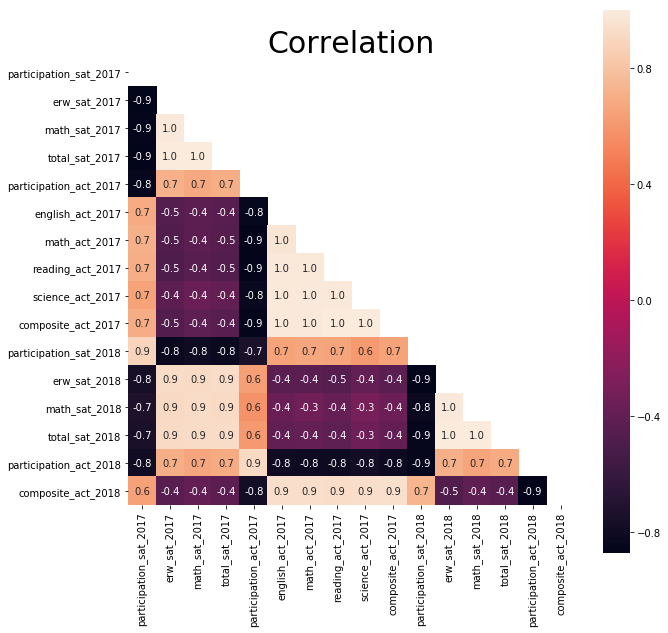

In [74]:
#Plot figsize
fig, ax = plt.subplots(figsize=(10,10))  
#Create Correlation 
corr = final.corr()
#Mask to drop redundant corr.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, mask=mask, square=True, annot=True, ax=ax,fmt=".1f")
ax.set_title('Correlation',fontsize = 30)

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [75]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(20,80)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
    for y in list_of_titles:
        plt.title(y)
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C3C1BFF6D8>,
      dtype=object)

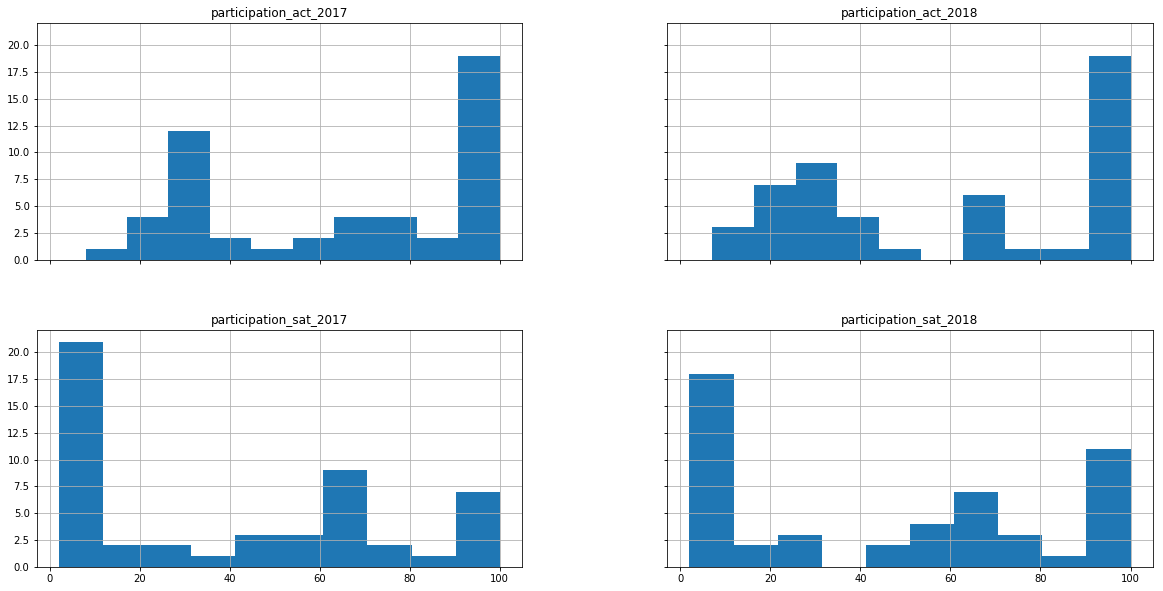

In [76]:
final[["participation_sat_2018","participation_act_2018","participation_sat_2017","participation_act_2017"]].hist(figsize=(20,10), sharex=True, sharey=True)

<strong> Intepretation:</strong>  As compared to 2017, there is a relatively higher no. of states with 90%-100% participation rate for SAT. When compared to ACT 2018, there is relatively lower no. of states with 90%-100% participation rate for SAT.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C3C1A1A160>,
      dtype=object)

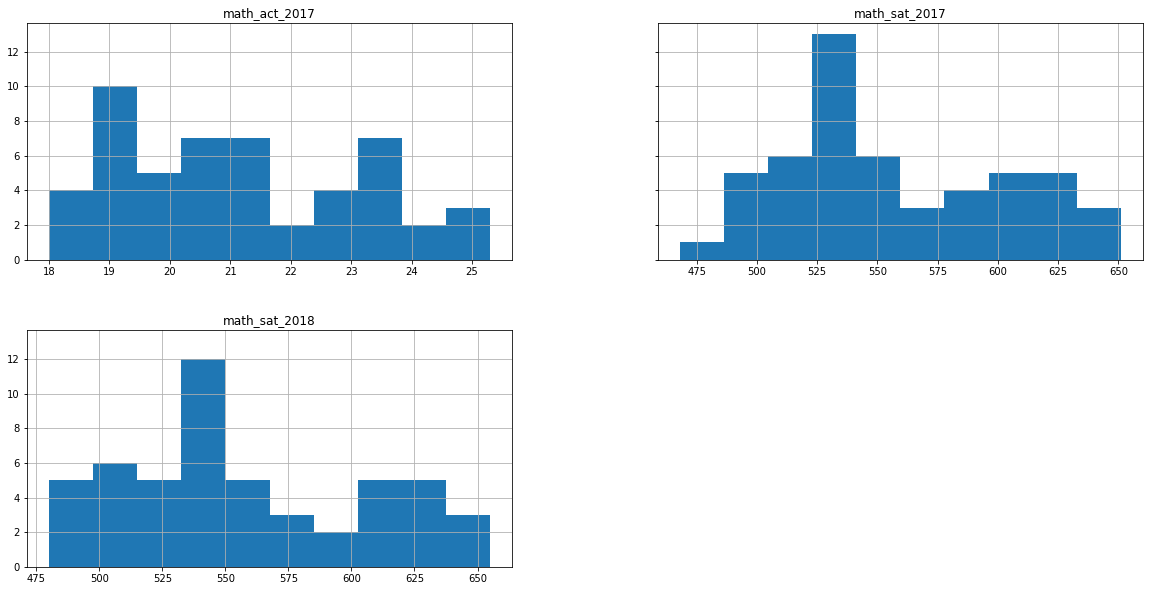

In [77]:
final[["math_sat_2018","math_sat_2017","math_act_2017"]].hist(figsize=(20,10),sharey=True)

<strong> Intepretation:</strong>  Most states achieved a score between 525 to 550 for SAT Maths,and a composite score of ~19 for ACT Maths. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C3C1FADB70>,
      dtype=object)

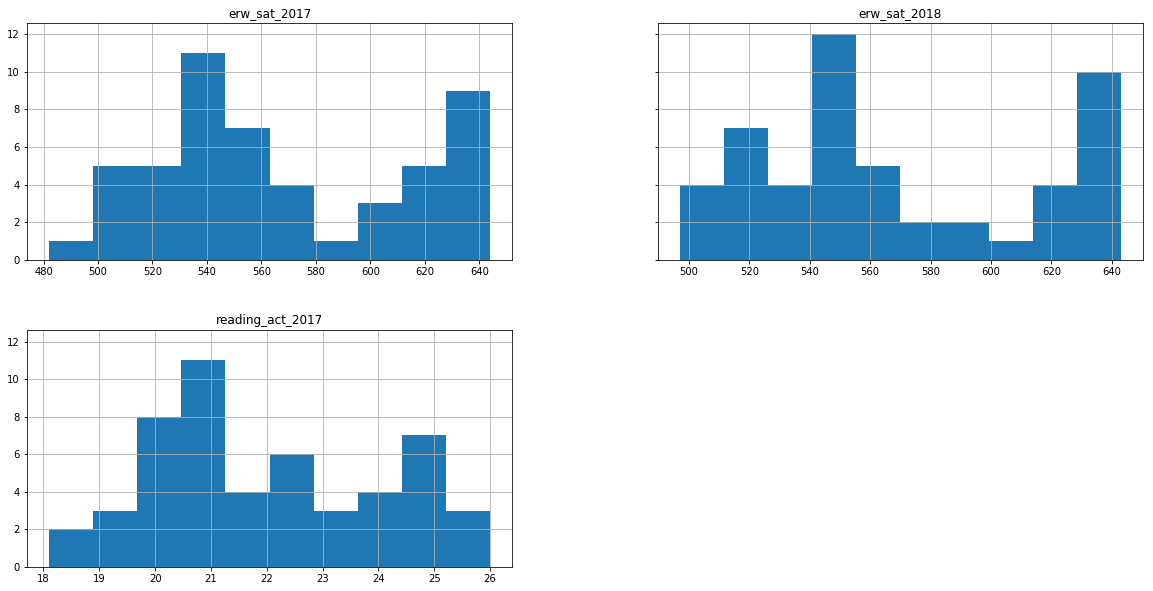

In [78]:
final[["erw_sat_2018","erw_sat_2017","reading_act_2017"]].hist(figsize=(20,10),sharey=True)

<strong> Intepretation:</strong>  Most states achieved a score between 540 and 560 for Reading & Writing SAT. This applies for both 2017 and 2018 results. On the other hand, most states achieved a score between 20 and 21 for Reading ACT 2017.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


<strong> Intepretation:</strong> math_act 2017 is negatively correlated with math_sat 2017. States which did well in math ACT are tend not to do well in math SAT. Similar observations are seen for reading and total test scores. 

C:\Users\Serene\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'SAT vs. ACT math scores for 2017')

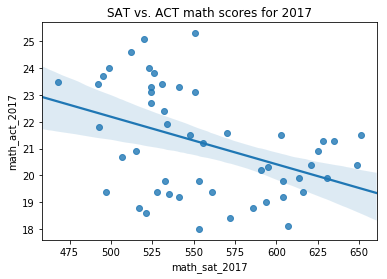

In [79]:
sns.regplot(x=final["math_sat_2017"], y=final["math_act_2017"], fit_reg=True).set_title('SAT vs. ACT math scores for 2017')

Text(0.5, 1.0, 'SAT vs. ACT verbal/reading scores for 2017')

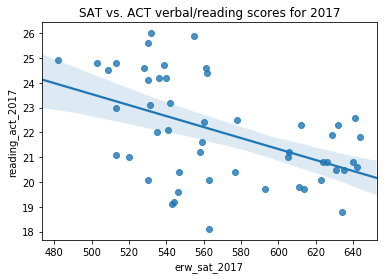

In [80]:
sns.regplot(x=final["erw_sat_2017"], y=final["reading_act_2017"], fit_reg=True).set_title('SAT vs. ACT verbal/reading scores for 2017')

Text(0.5, 1.0, 'SAT vs. ACT total/composite scores for 2017')

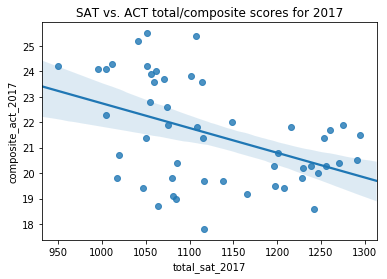

In [81]:
sns.regplot(x=final["total_sat_2017"], y=final["composite_act_2017"], fit_reg=True).set_title('SAT vs. ACT total/composite scores for 2017')

<strong> Interpretation </strong>: Total test scores are highly correlated year on year. States that did well in respective tests in 2017 tend to do well in the following year. 

Text(0.5, 1.0, 'SAT total scores for 2017 vs 2018')

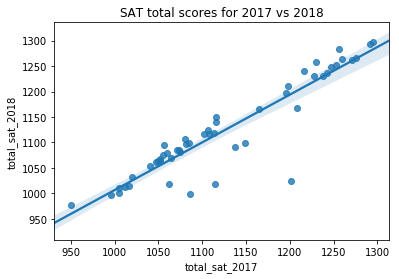

In [82]:
sns.regplot(x=final["total_sat_2017"], y=final["total_sat_2018"], fit_reg=True).set_title('SAT total scores for 2017 vs 2018')

Text(0.5, 1.0, 'ACT total scores for 2017 vs 2018')

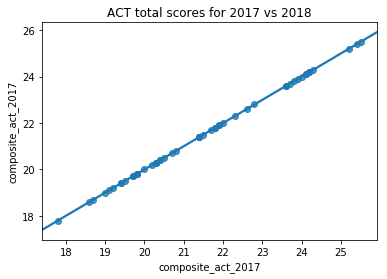

In [83]:
sns.regplot(x=final["composite_act_2017"], y=final["composite_act_2017"], fit_reg=True).set_title('ACT total scores for 2017 vs 2018')

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

<strong> Interpretation </strong>: The participation rate are spread across a wide range across states, for both tests.

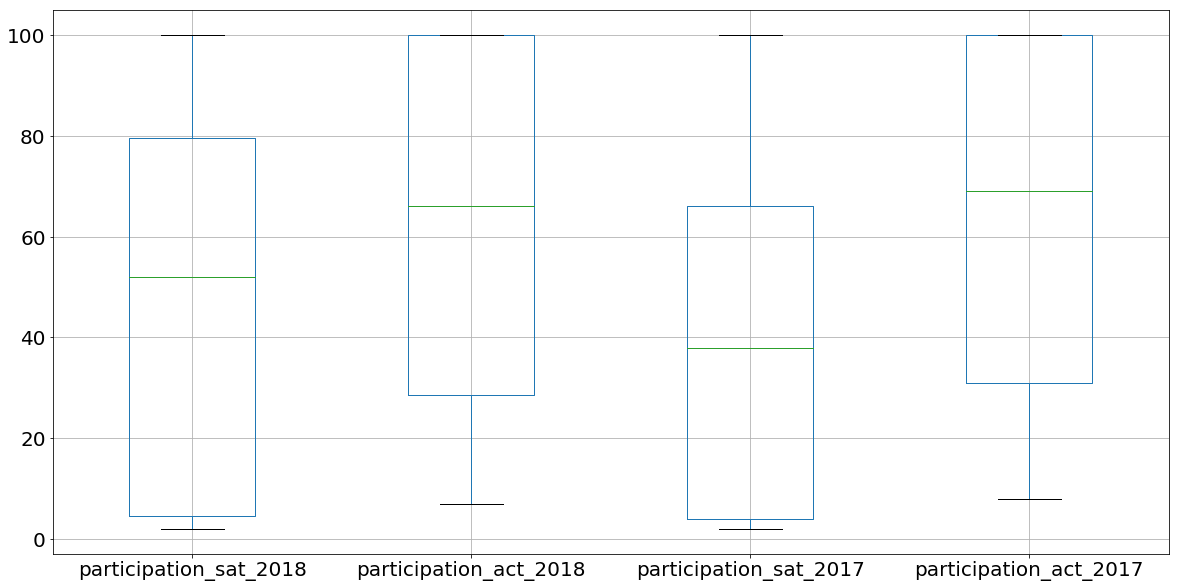

In [84]:
# Code

final[["participation_sat_2018","participation_act_2018","participation_sat_2017","participation_act_2017"]].boxplot(fontsize=20, figsize=(20,10))

<strong> Interpretation </strong>: The median score for both tests remain similar year on year. 

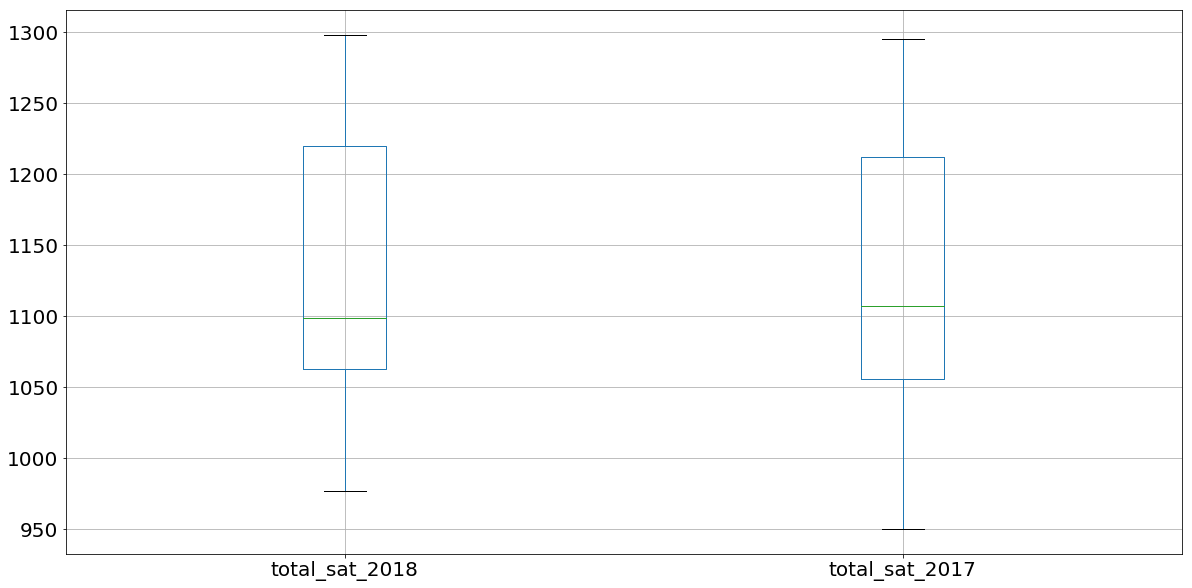

In [85]:
final[["total_sat_2018","total_sat_2017"]].boxplot(fontsize=20, figsize=(20,10))

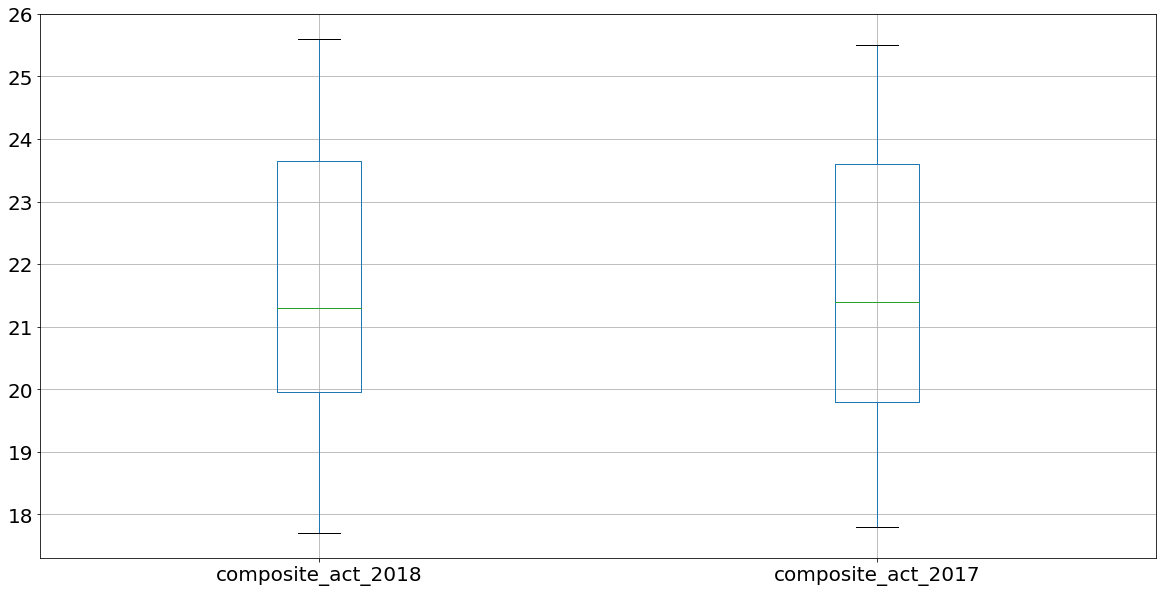

In [86]:
final[["composite_act_2018","composite_act_2017"]].boxplot(fontsize=20, figsize=(20,10))

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

<strong> Interpretation: </strong> Participation rate is negatively correlated with overall SAT/ACT performance.

Text(0.5, 1.0, 'Participation rate vs. total SAT scores for 2017')

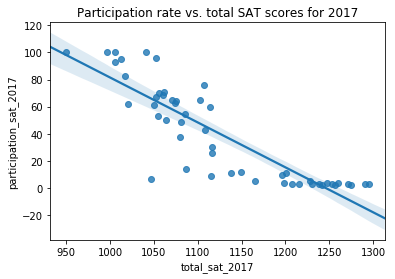

In [94]:
sns.regplot(x=final["total_sat_2017"], y=final["participation_sat_2017"], fit_reg=True).set_title('Participation rate vs. total SAT scores for 2017')

Text(0.5, 1.0, 'Participation rate vs. total SAT scores for 2018')

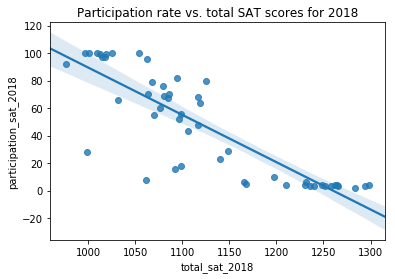

In [95]:
sns.regplot(x=final["total_sat_2018"], y=final["participation_sat_2018"], fit_reg=True).set_title('Participation rate vs. total SAT scores for 2018')

C:\Users\Serene\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Participation rate vs. composite ACT scores for 2017')

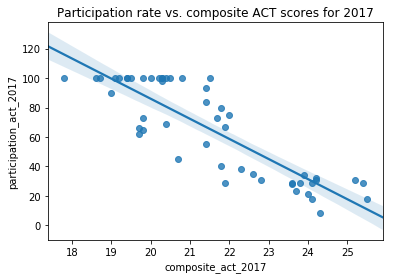

In [98]:
sns.regplot(x=final["composite_act_2017"], y=final["participation_act_2017"], fit_reg=True).set_title('Participation rate vs. composite ACT scores for 2017')

Text(0.5, 1.0, 'Participation rate vs. composite ACT scores for 2018')

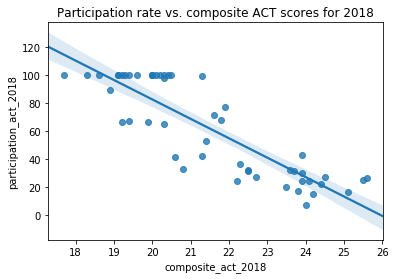

In [96]:
sns.regplot(x=final["composite_act_2018"], y=final["participation_act_2018"], fit_reg=True).set_title('Participation rate vs. composite ACT scores for 2018')

In [169]:
performance = pd.DataFrame(final["participation_sat_2018"]-final["participation_sat_2017"])
performance.columns = ['YOY_DIFF'] 

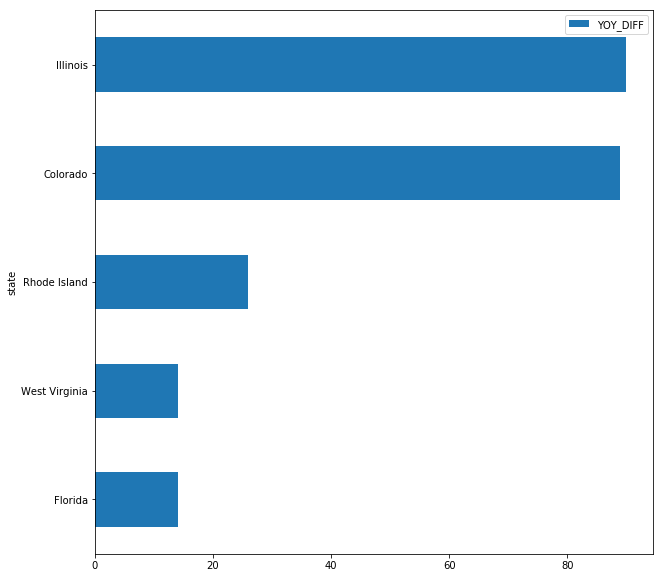

In [171]:
performance.sort_values(by="YOY_DIFF",ascending=True).tail(5).plot.barh(figsize=(10,10))
ax.set_title = "Year on Year SAT Score Difference"

<strong> Intepretation: </strong> In addition to Colorado, Illinois also experience a sharp increase in participation rate.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [88]:
final.head()

participation_sat_2017  erw_sat_2017  math_sat_2017  \
state                                                             
Alabama                        5.0           593            572   
Alaska                        38.0           547            533   
Arizona                       30.0           563            553   
Arkansas                       3.0           614            594   
California                    53.0           531            524   

            total_sat_2017  participation_act_2017  english_act_2017  \
state                                                                  
Alabama               1165                   100.0              18.9   
Alaska                1080                    65.0              18.7   
Arizona               1116                    62.0              18.6   
Arkansas              1208                   100.0              18.9   
California            1055                    31.0              22.5   

            math_act_2017  reading_act_2017  science_act_2017  \
state                                                           
Alabama              18.4              19.7              19.4   
Alaska               19.8              20.4              19.9   
Arizona              19.8              20.1              19.8   
Arkansas             19.0              19.7              19.5   
California           22.7              23.1              22.2   

            composite_act_2017  participation_sat_2018  erw_sat_2018  \
state                                                                  
Alabama                   19.2                     6.0           595   
Alaska                    19.8                    43.0           562   
Arizona                   19.7                    29.0           577   
Arkansas                  19.4                     5.0           592   
California                22.8                    60.0           540   

            math_sat_2018  total_sat_2018  participation_act_2018  \
state                                                               
Alabama               571            1166                   100.0   
Alaska                544            1106                    33.0   
Arizona               572            1149                    66.0   
Arkansas              576            1168                   100.0   
California            536            1076                    27.0   

            composite_act_2018  
state                           
Alabama                   19.1  
Alaska                    20.8  
Arizona                   19.2  
Arkansas                  19.4  
California                22.7

Answers:

C:\Users\Serene\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Density Plot - Participation Rate')

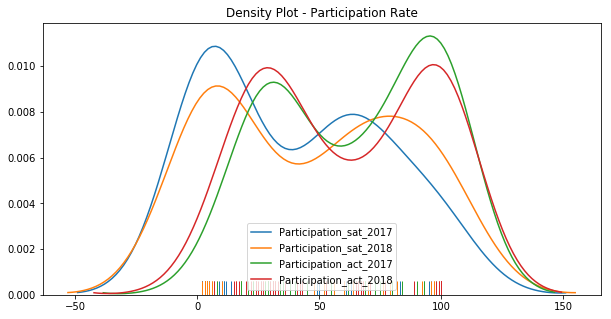

In [89]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.distplot(final[['participation_sat_2017']], hist=False, rug=True, label="Participation_sat_2017")
ax = sns.distplot(final[['participation_sat_2018']], hist=False, rug=True, label="Participation_sat_2018")
ax = sns.distplot(final[['participation_act_2017']], hist=False, rug=True, label="Participation_act_2017")
ax = sns.distplot(final[['participation_act_2018']], hist=False, rug=True, label="Participation_act_2018")
ax.set_title ("Density Plot - Participation Rate")

<strong> Interpretation: </strong>
The same tests regardless of years have nearly identical participation rate distributions. And the participation rate of ACT tends to be higher than SAT. Kernel density estimates can extend the tails of the distribution into areas where no data exist Here, the density estimate has been allowed to extend into the negative participation rate. This is clearly nonsensical and should be avoided.

Text(0.5, 1.0, 'Density Plot - SAT 2017')

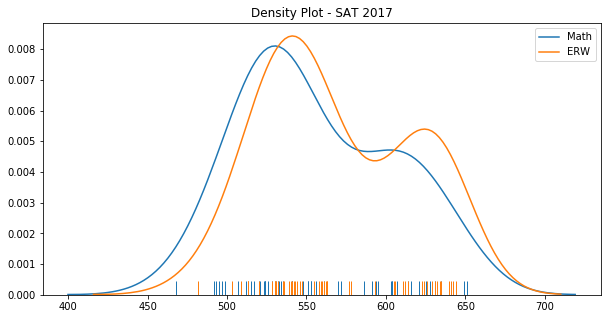

In [90]:
fig, ax = plt.subplots(figsize=(10,5))  
ax = sns.distplot(final[['math_sat_2017']], hist=False, rug=True, label="Math")
ax = sns.distplot(final[['erw_sat_2017']], hist=False, rug=True, label="ERW")
ax.set_title ("Density Plot - SAT 2017")

<strong> Interpretation: </strong>
For SAT, Maths and ERW have nearly identical score distributions. And the scores of ERW tend to be slightly higher than Maths.

Text(0.5, 1.0, 'Density Plot - ACT 2017')

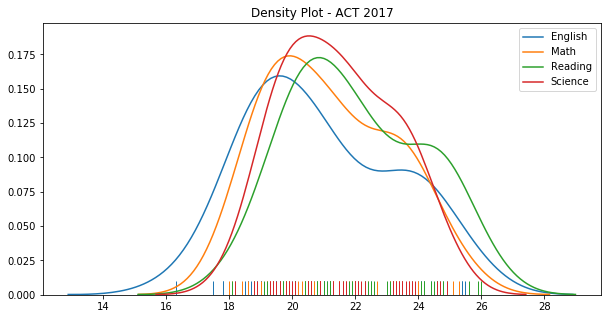

In [91]:
fig, ax = plt.subplots(figsize=(10,5))  
ax = sns.distplot(final[['english_act_2017']], hist=False, rug=True, label="English")
ax = sns.distplot(final[['math_act_2017']], hist=False, rug=True, label="Math")
ax = sns.distplot(final[['reading_act_2017']], hist=False, rug=True, label="Reading")
ax = sns.distplot(final[['science_act_2017']], hist=False, rug=True, label="Science")
ax.set_title ("Density Plot - ACT 2017")

<strong> Interpretation: </strong>
Similarly, for ACT, students across states then to perform better in Science and Reading. 

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

<strong> Answer: </strong> No. The plots make it clear that the distribution is distinctly skewed, not normal. Same observations for participation rates, maths and reading scores. 

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

<strong> Answer: </strong> 
It would affect the accuracy of the estimates made from these data as a large number of statistical tests are based on the assumption of normality. 

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

<strong> Answer: </strong> 
No. It does not make sense to conduct statistical inference with the data given as these are aggregated average scores by states. It would be better to have data that is more granular (ie. scores at individual student levels) and bigger sample/population size to perform statistical inference.


##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

<strong> Answer: </strong> 
It is not appropriate to compare specific SAT and ACT math scores by absolute values because these scores are derived from different measurements. The data is not normally distributed and are of aggregated scores, hence not recommended to be used to perform statistical inference.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

<strong> Answer </strong> There is a sharp year on year increase in Colorado participation rate for SAT. New contract signed with Colorado and Illinois were instrumental in the SAT’s growth. (https://www.washingtonpost.com/education/2018/10/23/sat-reclaims-title-most-widely-used-college-admission-test/?utm_term=.68e484d0b9d5)


The high participation rate in ACT for Hawaii, North and South Carolina are likely because these states provide ACT test for free. However, Florida and Georgia have yet to benefit from it yet.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

<strong>Conclusions and Recommendations </strong>:
College Board to tackle the lower hanging fruits (currently participation rate is >50%) - Georgia, Hawaii, North and South Carolina by providing SAT for free.

As states are beginning to use college admissions tests to meet national standards required of public high schools, they’re starting to make the ACT/SAT mandatory. College Board to identify, approach and sign contracts with states with high population high school children.

Georgia population is relatively higher than Hawaii, North and South Carolina, no contract signed with ACT yet. Good chance for College Board to sign a contract with the state to make SAT mandatory.

States with high participation rate are more likely to achieve lower scores in SAT, College Board to consider providing assistance to students to prepare them for the test - so as to provide more success stories and encourage higher adoption!